In [1]:
# Import packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the data into the dataframe 'data'

data = pd.read_csv('04_cricket_1999to2011.csv')

In [3]:
data.head()

,Match,Date,Innings,Over,Runs,Total.Runs,Innings.Total.Runs,Runs.Remaining,Total.Out,Innings.Total.Out,...,at.bat.won.toss,at.bat.at.home,at.bat.bat.first,chose_bat_1st,chose_bat_2nd,forced_bat_1st,forced_bat_2nd,new.game,Error.In.Data,common.support
0,65193,14/05/1999,1,1,4,4,204,200,0,10,...,0,0,1,0,0,1,0,1,0,1
1,65193,14/05/1999,1,2,2,6,204,198,0,10,...,0,0,1,0,0,1,0,0,0,1
2,65193,14/05/1999,1,3,3,9,204,195,0,10,...,0,0,1,0,0,1,0,0,0,1
3,65193,14/05/1999,1,4,2,20,204,184,0,10,...,0,0,1,0,0,1,0,0,0,1
4,65193,14/05/1999,1,5,6,37,204,167,0,10,...,0,0,1,0,0,1,0,0,0,1


In [4]:
# No of samples and features given in the data which is MxN
data.shape

(126768, 38)

In [5]:
# Shape == non null values there for No null values involved but run rate has null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126768 entries, 0 to 126767
Data columns (total 38 columns):
Match                        126768 non-null int64
Date                         126768 non-null object
Innings                      126768 non-null int64
Over                         126768 non-null int64
Runs                         126768 non-null int64
Total.Runs                   126768 non-null int64
Innings.Total.Runs           126768 non-null int64
Runs.Remaining               126768 non-null int64
Total.Out                    126768 non-null int64
Innings.Total.Out            126768 non-null int64
Outs.Remaining               126768 non-null int64
Wickets.in.Hand              126768 non-null int64
Run.Rate                     126768 non-null float64
Innings.Run.Rate             126768 non-null float64
Run.Rate.Required            125659 non-null float64
Initial.Run.Rate.Required    126768 non-null float64
Target.Score                 126768 non-null int64
Day-night    

# PartA - Strategy for first 10 overs to successfully chase target 300

# Method-1 (PartA) - Descriptive stastics

In [6]:
'''
Feature selection: I am picking out features which are required.
Note that some features are dervied features and ignore them.
'''
q1_data = data[['Match', 'Innings', 'Over', 'Runs', 'Total.Runs', 'at.bat.wins','Innings.Total.Runs',
                'Target.Score']]

In [7]:
q1_data.head()

,Match,Innings,Over,Runs,Total.Runs,at.bat.wins,Innings.Total.Runs,Target.Score
0,65193,1,1,4,4,0,204,-1
1,65193,1,2,2,6,0,204,-1
2,65193,1,3,3,9,0,204,-1
3,65193,1,4,2,20,0,204,-1
4,65193,1,5,6,37,0,204,-1


In [8]:
# Get the individual matches id

matches = np.unique(q1_data.Match)

In [9]:
# Creating match_dict in which keys are match_id and values are dataframe of that match

match_dict = {}
winnings = 0 # Counting the number of wins with constraints added on it
for i in range(len(matches)):
    match_id = 'match' + str(i+1)
    # match_data has only second innings data and batting in the second innings won
    match_data = q1_data[q1_data.Match == matches[i]][q1_data.Innings == 2][q1_data['at.bat.wins'] == 1]
    # Here collecting data only if target is in between 300 and 320
    if (q1_data[q1_data.Match == matches[i]][q1_data.Innings == 1]['Innings.Total.Runs'].iloc[0] >= 300):
        if (q1_data[q1_data.Match == matches[i]][q1_data.Innings == 1]['Innings.Total.Runs'].iloc[0] <= 330):
            match_dict.update({match_id: match_data})
            winnings += 1
            

In [10]:
# No of winnings matches in the second innings

winnings

140

In [11]:
# Now collecting the keys which are match_id's

winnings_keys = list(match_dict.keys())

In [12]:
runs_1 = []
runs_2 = []
runs_3 = []
runs_4 = []
runs_5 = []
runs_6 = []
runs_7 = []
runs_8 = []
runs_9 = []
runs_10 = []
for i in winnings_keys:
    take_data = match_dict[i]
    if take_data.shape[0] < 10:
        continue
    runs_1 += [take_data.Runs.iloc[0]]
    runs_2 += [take_data.Runs.iloc[1]]
    runs_3 += [take_data.Runs.iloc[2]]
    runs_4 += [take_data.Runs.iloc[3]]
    runs_5 += [take_data.Runs.iloc[4]]
    runs_6 += [take_data.Runs.iloc[5]]
    runs_7 += [take_data.Runs.iloc[6]]
    runs_8 += [take_data.Runs.iloc[7]]
    runs_9 += [take_data.Runs.iloc[8]]
    runs_10 += [take_data.Runs.iloc[9]]

In [13]:
mean_runrate = (np.mean(runs_1) + np.mean(runs_2) + np.mean(runs_3) + np.mean(runs_4) + np.mean(runs_5)\
+ np.mean(runs_6)+ np.mean(runs_7) + np.mean(runs_8)+ np.mean(runs_9)+ np.mean(runs_10))/10

In [14]:
mean_runrate

6.885185185185184

In [15]:
median_runrate = (np.median(runs_1) + np.median(runs_2) + np.median(runs_3) + np.median(runs_4) +\
                  np.median(runs_5)+ np.median(runs_6)+ np.median(runs_7) + np.median(runs_8)+\
                  np.median(runs_9)+ np.median(runs_10))/10

In [16]:
median_runrate

6.4

# Method-2 (Part-A)- Linear Regression

In [17]:
# Creating match_dict in which keys are match_id and values are dataframe of that match
match_dict = {}
winnings = 0 # Counting the number of wins with constraints added on it
for i in range(len(matches)):
    match_id = 'match' + str(i+1)
    # match_data has only second innings data and batting in the second innings won
    match_data = q1_data[q1_data.Match == matches[i]][q1_data.Innings == 2][q1_data['at.bat.wins'] == 1]
    match_dict.update({match_id: match_data})
    winnings += 1

In [18]:
winnings

1423

In [19]:
winnings_keys = list(match_dict.keys())

In [20]:
# Fit the linear line between the target and the runrate at the 10th over of the winning data

# Collect the data of 10th over runrate which can be derived from the total runs and the over which is 10th.
run_rate_10 = []
target = []
for i in winnings_keys:
    take_data = match_dict[i]
    if take_data.shape[0] < 10:
        continue
    run_rate_10 += [take_data['Total.Runs'].iloc[9]/10]
    target += [take_data['Target.Score'].iloc[0]]

In [21]:
import matplotlib.pyplot as plt
plt.scatter(target, run_rate_10)

In [22]:
# Apply linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
target_mean = np.mean(target)
run_rate_mean = np.mean(run_rate_10)
target_shifted = target - np.mean(target)
run_rate_shifted = run_rate_10 - np.mean(run_rate_10)

X = pd.Series(target_shifted).ravel().reshape(-1,1)
Y = pd.Series(run_rate_shifted).ravel().reshape(-1,1)
regressor.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
Y_pred = regressor.predict(Y)

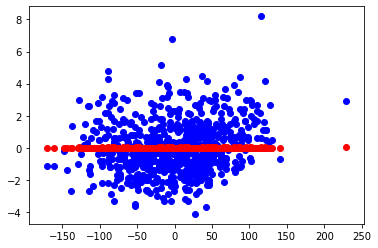

In [24]:
plt.scatter(X,Y, color = 'blue')
plt.scatter(X,Y_pred, color = 'red')

In [25]:
# Now predict for Target score of 300
x_test = (300 - target_mean).reshape(-1,1)
y_test = regressor.predict(x_test)

In [26]:
run_rate_maintained = y_test + run_rate_mean

In [27]:
run_rate_maintained

array([[5.58228413]])

# PartB - Best strategy after 10overs  50-2

In [28]:
# Currently India at 50-2, so remaining runs is 250. Now consider columns which has remaining runs
'''
Part_B
Feature selection: I am choosing features from the given 38 features
'''
q2_data = data[['Match', 'Innings', 'Over', 'Runs', 'Total.Runs', 'at.bat.wins',
                'Winning.Team', 'Innings.Total.Runs', 'Outs.Remaining', 'Runs.Remaining','Target.Score']]

In [29]:
matches_q2 = np.unique(q2_data.Match)

In [30]:
match_q2_dict = {}
winnings_q2 = 0
for i in range(len(matches_q2)):
    match_id = 'match' + str(i+1)
    match_data = q2_data[q2_data.Match == matches_q2[i]][q2_data.Innings == 2][q2_data['at.bat.wins'] == 1]
    
    if (q2_data[q2_data.Match == matches_q2[i]][q2_data.Innings == 1]['Innings.Total.Runs'].iloc[0] >= 300):
        if (q2_data[q2_data.Match == matches_q2[i]][q2_data.Innings == 1]['Innings.Total.Runs'].iloc[0] <= 330):
            if (q2_data[q2_data.Match == matches_q2[i]]['Runs.Remaining'].iloc[10] >= 250):
                if (q2_data[q2_data.Match == matches_q2[i]]['Runs.Remaining'].iloc[10] <= 270):
                    if q2_data[q2_data.Match == matches_q2[i]]['Outs.Remaining'].iloc[0] >= 6:
                        if q2_data[q2_data.Match == matches_q2[i]]['Outs.Remaining'].iloc[0] >= 8:
                            match_q2_dict.update({match_id: match_data})
                            winnings_q2 += 1

In [31]:
winnings_q2

18

In [32]:
winnings_q2_keys = list(match_q2_dict.keys())

In [33]:
runs_11 = []
runs_12 = []
runs_13 = []
runs_14 = []
runs_15 = []
runs_16 = []
runs_17 = []
runs_18 = []
runs_19 = []
runs_20 = []
for i in winnings_q2_keys:
    take_data = match_q2_dict[i]
    if take_data.shape[0] < 20:
        continue
    runs_11 += [take_data.Runs.iloc[0]]
    runs_12 += [take_data.Runs.iloc[1]]
    runs_13 += [take_data.Runs.iloc[2]]
    runs_14 += [take_data.Runs.iloc[3]]
    runs_15 += [take_data.Runs.iloc[4]]
    runs_16 += [take_data.Runs.iloc[5]]
    runs_17 += [take_data.Runs.iloc[6]]
    runs_18 += [take_data.Runs.iloc[7]]
    runs_19 += [take_data.Runs.iloc[8]]
    runs_20 += [take_data.Runs.iloc[9]]

In [34]:
mean_runrate_q2 = (np.mean(runs_11) + np.mean(runs_12) + np.mean(runs_13) + np.mean(runs_14) + np.mean(runs_15)\
+ np.mean(runs_16)+ np.mean(runs_17) + np.mean(runs_18)+ np.mean(runs_19)+ np.mean(runs_20))/10

In [35]:
mean_runrate_q2

6.840000000000001

In [36]:
median_runrate_q2 = (np.median(runs_11) + np.median(runs_12) + np.median(runs_13) + np.median(runs_14) +\
                  np.median(runs_15)+ np.median(runs_16)+ np.median(runs_17) + np.median(runs_18)+\
                  np.median(runs_19)+ np.median(runs_20))/10

In [37]:
median_runrate_q2

6.6

In [38]:
np.mean(runs_20)

10.2

# Part-B: Method-2(Linear regression)

In [39]:
match_q2_dict = {}
winnings_q2 = 0
rem_target_q2 = []
wickets_fallen = []
target_q2 = []

for i in range(len(matches_q2)):
    match_id = 'match' + str(i+1)
    match_data = q2_data[q2_data.Match == matches_q2[i]][q2_data.Innings == 2][q2_data['at.bat.wins'] == 1]
    match_q2_dict.update({match_id: match_data})
    winnings_q2 += 1

In [40]:
winnings_q2

1423

In [41]:
winnings_q2_keys = list(match_q2_dict.keys())

In [42]:
# Fit the linear line between the target and the runrate at the 10th over of the winning data

# Collect the data of 10th over runrate which can be derived from the total runs and the over which is 10th.
run_rate_20 = []
rem_target = []
rem_wickets = []
shape = []
for i in winnings_keys:
    take_data = match_q2_dict[i]
    shape += [take_data.shape[0]]
    if take_data.shape[0] < 20:
        continue
    run_rate_20 += [take_data['Total.Runs'].iloc[19]/20]
    rem_target += [take_data['Target.Score'].iloc[0] - take_data['Total.Runs'].iloc[9]]
    rem_wickets += [take_data['Outs.Remaining'].iloc[9]] 

In [43]:
runrate20_mean = np.mean(run_rate_20)
rem_target_mean = np.mean(rem_target)
rem_wickets_mean = np.mean(rem_wickets)

In [44]:
runrate20_shifted = run_rate_20 - runrate20_mean
rem_target_shifted = rem_target - rem_target_mean
rem_wickets_shifted = rem_wickets - rem_wickets_mean

In [45]:
# Fit the linear regression with the features as remaining runs and remaining wickets and y as run_rate_20

Y = pd.Series(runrate20_shifted).ravel().reshape(-1,1)

In [46]:
X1 = pd.Series(rem_target_shifted).ravel().reshape(-1,1)
X2 = pd.Series(rem_wickets_shifted).ravel().reshape(-1,1)

In [47]:
X = np.concatenate((X1, X2), axis = 1)

In [48]:
# Apply linear regression
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
Y_pred = lin.predict(X)

In [50]:
# Now predicting at 10 th over is 50-2, remaining target is 250
rem_target_test = np.array([250 - rem_target_mean])
rem_wickets_test = np.array([8 - rem_wickets_mean])
X_test =np.transpose(np.array([rem_target_test, rem_wickets_test]))
prediction = lin.predict(X_test) + runrate20_mean

In [51]:
prediction

array([[4.85569116]])